# Time-varying frame

> Renato Naville Watanabe, Marcos Duarte  
> [Laboratory of Biomechanics and Motor Control](http://pesquisa.ufabc.edu.br/bmclab)  
> Federal University of ABC, Brazil

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-setup" data-toc-modified-id="Python-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python setup</a></span></li><li><span><a href="#Cartesian-coordinate-system" data-toc-modified-id="Cartesian-coordinate-system-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cartesian coordinate system</a></span></li><li><span><a href="#Determination-of-a-coordinate system" data-toc-modified-id="Determination-of-a-coordinate system-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Determination of a coordinate system</a></span></li><li><span><a href="#Time-varying-basis" data-toc-modified-id="Time-varying-basis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Time varying basis</a></span><ul class="toc-item"><li><span><a href="#Tangential-versor" data-toc-modified-id="Tangential-versor-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Tangential versor</a></span></li><li><span><a href="#Normal-versor" data-toc-modified-id="Normal-versor-3.1"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Normal versor</a></span></li><li><span><a href="#Binormal-versor" data-toc-modified-id="Binormal-versor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Binormal versor</a></span></li></ul></li><li><span><a href="#Velocity-and-Acceleration-in-a time-varying-frame" data-toc-modified-id="Velocity-and-Acceleration-in-a time-varying-frame-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Velocity and Acceleration in a time-varying frame</a></span><ul class="toc-item"><li><span><a href="#Velocity" data-toc-modified-id="Velocity-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Velocity</a></span></li><li><span><a href="#Acceleration" data-toc-modified-id="Acceleration-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Acceleration</a></span></li></ul></li><li><span><a href="#Example" data-toc-modified-id="Example-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Example</a></span><ul class="toc-item"><li><span><a href="#Solving-numerically" data-toc-modified-id="Solving-numerically-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Solving numerically</a></span></li><li><span><a href="#Symbolic-solution-(extra-reading)" data-toc-modified-id="Symbolic-solution-(extra-reading)-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Symbolic solution (extra reading)</a></span></li></ul></li><li><span><a href="#Further-reading" data-toc-modified-id="Further-reading-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Further reading</a></span></li><li><span><a href="#Problems" data-toc-modified-id="Problems-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Problems</a></span></li><li><span><a href="#References" data-toc-modified-id="References-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Python setup

In [1]:
import numpy as np
import sympy as sym
from sympy.vector import CoordSys3D
import matplotlib.pyplot as plt
sym.init_printing()
from sympy.plotting import plot_parametric
from sympy.physics.mechanics import ReferenceFrame, Vector, dot

## Cartesian coordinate system

As we perceive the surrounding space as three-dimensional, a convenient coordinate system is the [Cartesian coordinate system](http://en.wikipedia.org/wiki/Cartesian_coordinate_system) in the [Euclidean space](http://en.wikipedia.org/wiki/Euclidean_space) with three orthogonal axes as shown below. The axes directions are commonly defined by the [right-hand rule](http://en.wikipedia.org/wiki/Right-hand_rule) and attributed the letters X, Y, Z. The orthogonality of the Cartesian coordinate system is convenient for its use in classical mechanics, most of the times the structure of space is assumed having the [Euclidean geometry](http://en.wikipedia.org/wiki/Euclidean_geometry) and as consequence, the motion in different directions are independent of each other.  
<br>
<figure><img src="https://github.com/BMClab/BMC/blob/master/images/CCS.png?raw=1" width=350/><figcaption><center><i>Figure. Representation of a point and its position vector in a Cartesian coordinate system.</i></center></figcaption></figure>  

## Determination of a coordinate system

In Biomechanics, we may use different coordinate systems for convenience and refer to them as global, laboratory, local, anatomical, or technical reference frames or coordinate systems. 

From [linear algebra](http://en.wikipedia.org/wiki/Linear_algebra), a set of unit linearly independent vectors (orthogonal in the Euclidean space and each with norm (length) equals to one) that can represent any vector via [linear combination](http://en.wikipedia.org/wiki/Linear_combination) is called a <a href="http://en.wikipedia.org/wiki/Basis_(linear_algebra)">basis</a> (or **orthonormal basis**). The figure below shows a point and its position vector in the Cartesian coordinate system and the corresponding versors (**unit vectors**) of the basis for this coordinate system. See the notebook [Scalar and vector](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/ScalarVector.ipynb) for a description on vectors.  
<figure><img src="https://github.com/BMClab/BMC/blob/master/images/vector3Dijk.png?raw=1" width=350/><figcaption><center><i>Figure. Representation of a point $\mathbf{P}$ and its position vector $\overrightarrow{\mathbf{r}}$ in a Cartesian coordinate system. The versors <span class="notranslate">$\hat{\mathbf{i}},\, \hat{\mathbf{j}},\, \hat{\mathbf{k}}\,$ </span> form a basis for this coordinate system and are usually represented in the color sequence RGB (red, green, blue) for easier visualization.</i></center></figcaption></figure>  

One can see that the versors of the basis shown in the figure above have the following coordinates in the Cartesian coordinate system:

<span class="notranslate">
\begin{equation}
\hat{\mathbf{i}} = \begin{bmatrix}1\\0\\0 \end{bmatrix}, \quad \hat{\mathbf{j}} = \begin{bmatrix}0\\1\\0 \end{bmatrix}, \quad \hat{\mathbf{k}} = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\label{eq_1}
\end{equation}
</span>

Using the notation described in the figure above, the position vector $\overrightarrow{\mathbf{r}}$  can be expressed as:

<span class="notranslate">
\begin{equation}
\overrightarrow{\mathbf{r}} = x\hat{\mathbf{i}} + y\hat{\mathbf{j}} + z\hat{\mathbf{k}}
\label{eq_2}
\end{equation}
</span>

However, to use a fixed basis can lead to very complex expressions.

## Time varying basis

Consider that we have the position vector of a particle, moving in the path described by the parametric curve $s(t)$, described in a fixed reference frame as:

<span class="notranslate">
\begin{equation}
{\bf\hat{r}}(t) = {x}{\bf\hat{i}}+{y}{\bf\hat{j}} + {z}{\bf\hat{k}}
\label{eq_3}
\end{equation}
</span>

<figure><img src="https://github.com/BMClab/BMC/blob/master/images/velRefFrame.png?raw=1" width=500/><figcaption><center><i>Figure. Position vector of a moving particle in relation to a coordinate system.</i></center></figcaption></figure>  

### Tangential versor

Often we describe all the kinematic variables in this fixed reference frame. However, it is often useful to define a time-varying basis, attached to some point of interest. In this case, what is usually done is to choose as one of the basis vector a unitary vector in the direction of the velocity of the particle. Defining this vector as:

<span class="notranslate">
\begin{equation}
{\bf\hat{e}_t} = \frac{{\bf\vec{v}}}{\Vert{\bf\vec{v}}\Vert}
\label{eq_4}
\end{equation}
</span>

### Normal versor

For the second vector of the basis, we define first a vector of curvature of the path (the meaning of this curvature vector will be seeing in another notebook):

<span class="notranslate">
\begin{equation}
{\bf\vec{C}} = \frac{d{\bf\hat{e}_t}}{ds}
\label{eq_5}
\end{equation}
</span>

Note that $\bf\hat{e}_t$ is a function of the path $s(t)$. So, by the chain rule:

<span class="notranslate">
\begin{equation}
\frac{d{\bf\hat{e}_t}}{dt} = \frac{d{\bf\hat{e}_t}}{ds}\frac{ds}{dt} \longrightarrow \frac{d{\bf\hat{e}_t}}{ds} = \frac{\frac{d{\bf\hat{e}_t}}{dt}}{\frac{ds}{dt}} \longrightarrow {\bf\vec{C}} = \frac{\frac{d{\bf\hat{e}_t}}{dt}}{\frac{ds}{dt}}\longrightarrow {\bf\vec{C}} = \frac{\frac{d{\bf\hat{e}_t}}{dt}}{\Vert{\bf\vec{v}}\Vert}
\label{eq_6}
\end{equation}
</span>

Now we can define the second vector of the basis, ${\bf\hat{e}_n}$:

<span class="notranslate">
\begin{equation}
{\bf\hat{e}_n} = \frac{{\bf\vec{C}}}{\Vert{\bf\vec{C}}\Vert}
\label{eq_7}
\end{equation}
</span>

<figure><img src="https://github.com/BMClab/BMC/blob/master/images/velRefFrameeten.png?raw=1" width=500/><figcaption><center><i>Figure. A moving particle and a corresponding time varying basis.</i></center></figcaption></figure> 

### Binormal versor

The third vector of the basis is obtained by the cross product between ${\bf\hat{e}_n}$ and ${\bf\hat{e}_t}$.

<span class="notranslate">
\begin{equation}
{\bf\hat{e}_b} = {\bf\hat{e}_t} \times {\bf\hat{e}_n}
\label{eq_8}
\end{equation}
</span>

Note that the vectors ${\bf\hat{e}_t}$, ${\bf\hat{e}_n}$ and ${\bf\hat{e}_b}$ vary together with the particle movement.

## Velocity and Acceleration in a time-varying frame

### Velocity 

Given the expression of $r(t)$ in a fixed frame we can write the velocity ${\bf\vec{v}(t)}$ as a function of the fixed frame of reference ${\bf\hat{i}}$, ${\bf\hat{j}}$ and ${\bf\hat{k}}$ (see http://nbviewer.jupyter.org/github/BMClab/bmc/blob/master/notebooks/KinematicsParticle.ipynb)).

<span class="notranslate">
\begin{equation}
{\bf\vec{v}}(t) = \dot{x}{\bf\hat{i}}+\dot{y}{\bf\hat{j}}+\dot{z}{\bf\hat{k}}
\label{eq_9}
\end{equation}
</span>

However, this can lead to very complex functions. So it is useful to use the basis find previously ${\bf\hat{e}_t}$, ${\bf\hat{e}_n}$ and ${\bf\hat{e}_b}$.

The velocity ${\bf\vec{v}}$ of the particle is, by the definition of ${\bf\hat{e}_t}$, in the direction of ${\bf\hat{e}_t}$:

<span class="notranslate">
\begin{equation}
{\bf\vec{v}}={\Vert\bf\vec{v}\Vert}.{\bf\hat{e}_t}
\label{eq_10}
\end{equation}
</span>

### Acceleration

The acceleration can be written in the fixed frame of reference as:

<span class="notranslate">
\begin{equation}
{\bf\vec{a}}(t) = \ddot{x}{\bf\hat{i}}+\ddot{y}{\bf\hat{j}}+\ddot{z}{\bf\hat{k}}
\label{eq_11}
\end{equation}
</span>

But for the same reasons of the velocity vector, it is useful to describe the acceleration vector in the time varying basis. We know that the acceleration is the time derivative of the velocity:

<span class="notranslate">
\begin{align}
{\bf\vec{a}} =& \frac{{d\bf\vec{v}}}{dt}=\\
    =&\frac{{d({\Vert\bf\vec{v}\Vert}{\bf\hat{e}_t}})}{dt}=\\
    =&\dot{\Vert\bf\vec{v}\Vert}{\bf\hat{e}_t}+{\Vert\bf\vec{v}\Vert}\dot{{\bf\hat{e}_t}}=\\
    =&\dot{\Vert\bf\vec{v}\Vert}{\bf\hat{e}_t}+{\Vert\bf\vec{v}\Vert}\frac{d{\bf\hat{e}_t}}{ds}\frac{ds}{dt}=\\
    =&\dot{\Vert\bf\vec{v}\Vert}{\bf\hat{e}_t}+{\Vert\bf\vec{v}\Vert}^2\frac{d{\bf\hat{e}_t}}{ds}=\\
    =&\dot{\Vert\bf\vec{v}\Vert}{\bf\hat{e}_t}+{\Vert\bf\vec{v}\Vert}^2\Vert{\bf\vec{C}} \Vert {\bf\hat{e}_n}
\label{eq_12}
\end{align}
</span>


## Example
For example, consider that a particle follows the path described by the parametric curve below:

<span class="notranslate">
\begin{equation}
\vec{r}(t) = (10t+100){\bf{\hat{i}}} + \left(-\frac{9,81}{2}t^2+50t+100\right){\bf{\hat{j}}}
\label{eq_13}
\end{equation}
</span>

This curve could be, for example, from a projectile motion. See http://nbviewer.jupyter.org/github/BMClab/bmc/blob/master/notebooks/ProjectileMotion.ipynb for an explanation on projectile motion.

### Solving numerically

Now we will obtain the time-varying basis numerically. This method is useful when it is not available a mathematical expression of the path. This often happens when you have available data collected experimentally (most of the cases in Biomechanics). 

First, data will be obtained from the expression of $r(t)$. This is done to replicate the example above. You could use data collected experimentally, for example.

In [2]:
t = np.linspace(0, 10, 1000).reshape(-1,1)
r = np.hstack((10*t + 100, -9.81/2*t**2 + 50*t + 100))

Now, to obtain the $\bf{\hat{e_t}}$ versor, we can use Equation (4).

In [3]:
dt = t[1]
v = np.diff(r,axis=0)/dt
vNorm  = np.linalg.norm(v, axis=1, keepdims=True)

et = v/vNorm

And to obtain the versor $\bf{\hat{e_n}}$, we can use Equation (8).

In [4]:
C = np.diff(et,axis=0)/dt
C = C/vNorm[1:]

CNorm = np.linalg.norm(C, axis=1, keepdims=True)
en = C/CNorm

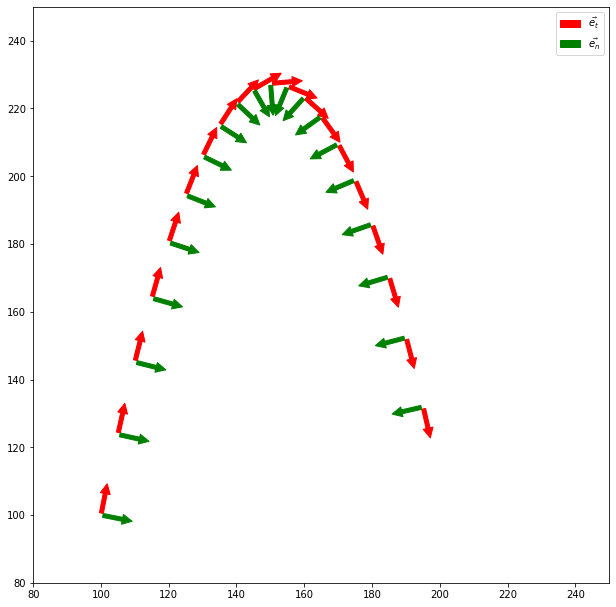

In [5]:
from matplotlib.patches import FancyArrowPatch
plt.rcParams['figure.figsize'] = (8,8)
fig = plt.figure()
plt.plot(r[:,0],r[:,1],'.')
ax = fig.add_axes([0,0,1,1])
time = np.linspace(0,10,10)
for i in np.arange(0, len(t)-2, 50):
    vec1 = FancyArrowPatch(r[i,:],r[i,:]+10*et[i,:],mutation_scale=20,color='r')
    vec2 = FancyArrowPatch(r[i,:],r[i,:]+10*en[i,:],mutation_scale=20,color='g')
    ax.add_artist(vec1)
    ax.add_artist(vec2)
plt.xlim((80,250))
plt.ylim((80,250))
plt.legend([vec1, vec2],[r'$\vec{e_t}$', r'$\vec{e_{n}}$'])
plt.show()

In [6]:
v  = vNorm*et
vNormDot  = np.diff(vNorm, axis=0)/dt

a = vNormDot*et[1:,:] + CNorm*en*vNorm[1:]**2

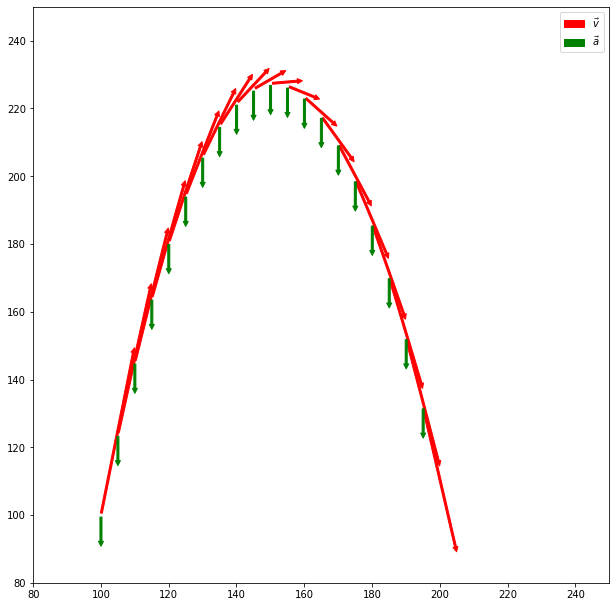

In [7]:
from matplotlib.patches import FancyArrowPatch
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,8)
fig = plt.figure()
plt.plot(r[:,0],r[:,1],'.')
ax = fig.add_axes([0,0,1,1])
for i in range(0,len(t)-2,50):
    vec1 = FancyArrowPatch(r[i,:],r[i,:]+v[i,:],mutation_scale=10,color='r')
    vec2 = FancyArrowPatch(r[i,:],r[i,:]+a[i,:],mutation_scale=10,color='g')
    ax.add_artist(vec1)
    ax.add_artist(vec2)
plt.xlim((80,250))
plt.ylim((80,250))
plt.legend([vec1, vec2],[r'$\vec{v}$', r'$\vec{a}$'])
plt.show()

### Symbolic solution (extra reading)

The computation here will be performed symbolically, with the symbolic math package of Python, Sympy. Below,a reference frame, called O,  and a varible for time (t) are defined.

In [8]:
O = sym.vector.CoordSys3D(' ')
t = sym.symbols('t')

Below the vector $r(t)$ is defined symbolically.

In [9]:
r = (10*t+100)*O.i + (-9.81/2*t**2+50*t+100)*O.j+0*O.k
r

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


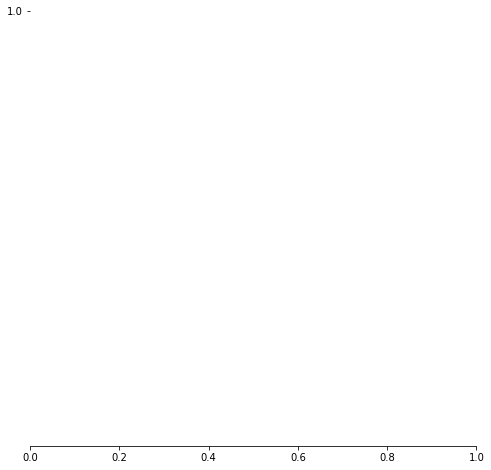

In [10]:
plot_parametric(r.dot(O.i), r.dot(O.j), (t, 0, 10))

In [11]:
v = sym.diff(r)
v

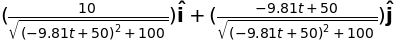

In [12]:
et = v/sym.sqrt(v.dot(v))
et

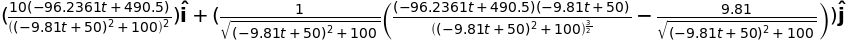

In [13]:
C = sym.diff(et)/sym.sqrt(v.dot(v))
C

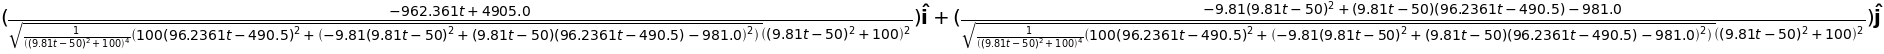

In [14]:
en = C/(sym.sqrt(C.dot(C)))
sym.simplify(en)

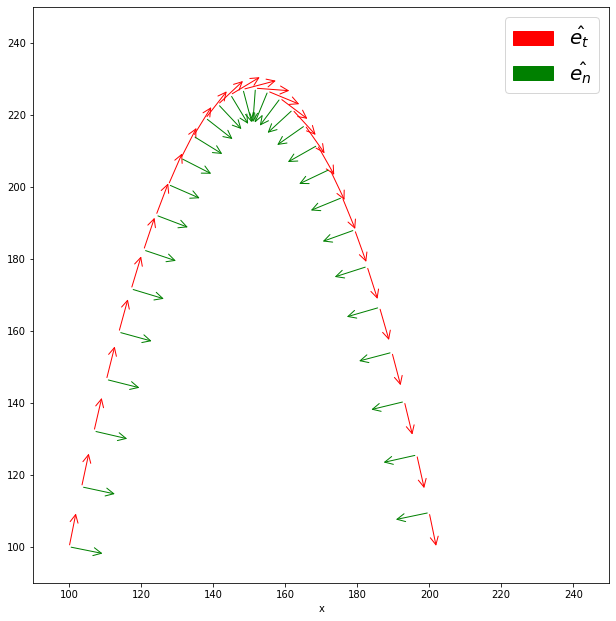

In [15]:
from matplotlib.patches import FancyArrowPatch
plt.rcParams['figure.figsize'] = (8, 8)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])    
ax.axis("on")
time = np.linspace(0,10,30)
for instant in time:
    vt = FancyArrowPatch([float(r.dot(O.i).subs(t,instant)),float(r.dot(O.j).subs(t,instant))], 
                         [float(r.dot(O.i).subs(t,instant))+10*float(et.dot(O.i).subs(t,instant)),
                          float(r.dot(O.j).subs(t, instant))+10*float(et.dot(O.j).subs(t,instant))], 
                         mutation_scale=20,
                         arrowstyle="->",color="r",label='${\hat{e_t}}$')
    vn = FancyArrowPatch([float(r.dot(O.i).subs(t, instant)),float(r.dot(O.j).subs(t,instant))], 
                         [float(r.dot(O.i).subs(t, instant))+10*float(en.dot(O.i).subs(t, instant)),
                          float(r.dot(O.j).subs(t, instant))+10*float(en.dot(O.j).subs(t, instant))], 
                         mutation_scale=20,
                         arrowstyle="->",color="g",label='${\hat{e_n}}$')
    ax.add_artist(vn)
    ax.add_artist(vt)
plt.xlim((90,250))
plt.ylim((90,250))
plt.xlabel('x')
plt.legend(handles=[vt,vn],fontsize=20)
plt.show()

Now we can find the vectors ${\bf\vec{v}}$ and ${\bf\vec{a}}$ described in the time varying frame.

In [16]:
v = sym.sqrt(v.dot(v))*et

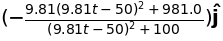

In [17]:
a = sym.diff(sym.sqrt(v.dot(v)))*et+v.dot(v)*sym.sqrt(C.dot(C))*en
sym.simplify(sym.simplify(a))

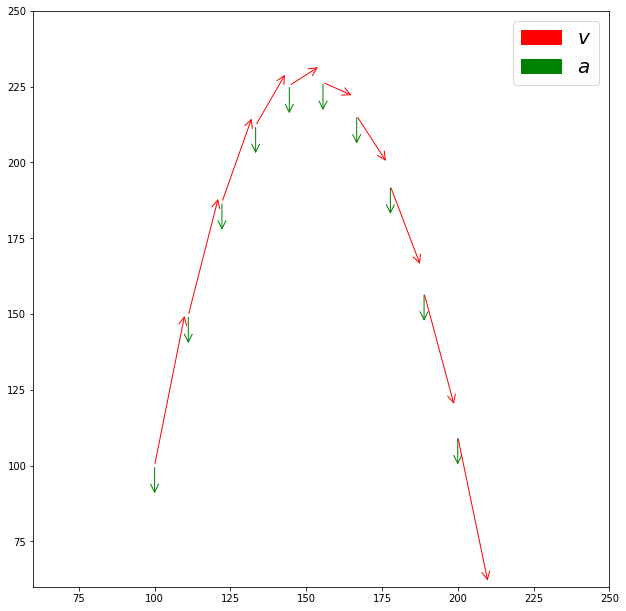

In [18]:
from matplotlib.patches import FancyArrowPatch
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])    
ax.axis("on")
time = np.linspace(0, 10, 10)
for instant in time:
    vt = FancyArrowPatch([float(r.dot(O.i).subs(t,instant)),float(r.dot(O.j).subs(t,instant))], 
                         [float(r.dot(O.i).subs(t,instant))+float(v.dot(O.i).subs(t,instant)),
                          float(r.dot(O.j).subs(t, instant))+float(v.dot(O.j).subs(t,instant))], 
                         mutation_scale=20,
                         arrowstyle="->",color="r",label='${{v}}$')
    vn = FancyArrowPatch([float(r.dot(O.i).subs(t, instant)),float(r.dot(O.j).subs(t,instant))], 
                         [float(r.dot(O.i).subs(t, instant))+float(a.dot(O.i).subs(t, instant)),
                          float(r.dot(O.j).subs(t, instant))+float(a.dot(O.j).subs(t, instant))], 
                         mutation_scale=20,
                         arrowstyle="->",color="g",label='${{a}}$')
    ax.add_artist(vn)
    ax.add_artist(vt)
plt.xlim((60, 250))
plt.ylim((60, 250))
plt.legend(handles=[vt, vn], fontsize=20)
plt.show()

## Further Reading

- Read pages 932-971 of the 18th chapter of the [Ruina and Rudra's book] (http://ruina.tam.cornell.edu/Book/index.html) about time-varying basis vectors.

## Problems

1. Obtain the vectors $\hat{e_n}$ and $\hat{e_t}$ for the problem 17.1.1 from Ruina and Rudra's book.
2. Solve the problem 17.1.9 from Ruina and Rudra's book.
3. Write a Python program to solve the problem 17.1.10 (only the part of $\hat{e_n}$ and $\hat{e_t}$).

## References

+ Ruina A, Rudra P (2019) [Introduction to Statics and Dynamics](http://ruina.tam.cornell.edu/Book/index.html). Oxford University Press. 